## Métodos de Otimização: Métodos de procura multidimensional

### Gradiente Conjugado- Diferenças finitas

__Imports:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import time
name = 'Gradiente Conjugado' 
Start = time.time()

__Função Avaliada:__

In [2]:
x=np.zeros(2 , dtype = 'float')
G =np.zeros(2 , dtype = 'float')

def f(x,nFunc,nVar,countFunc):
    f = open("var.dat", "w")
    f.write(str(nFunc)+"\n")
    f.write(str(nVar)+"\n")
    for i in range(0, len(x)):
        f.write(str(x[i])+'\n')
    f.close()
    
    result = os.system("funcao.exe")
    
    f = open("obj.dat", "r")
    u = float(f.read())
    f.close()
    countFunc += 1
    return u,countFunc

__Método:__

In [3]:
def grad(x,countFunc):
    epsilon = 1.e-10
    nFunc = 5; Qvar = 2
    
    for i in range(0,len(x)):
        xtmp=x.copy()
        xtmp[i]=xtmp[i]+epsilon
        F_xtmp, countFunc = f(xtmp,nFunc,Qvar,countFunc)
        F_x, countFunc = f(x,nFunc,Qvar,countFunc)
        G[i]=(F_xtmp-F_x)/epsilon
    
    return G,countFunc

In [4]:
def direcao(G,gamma,dold):
    
    d = -G+gamma*dold
    
    return d

In [5]:
def coef_conj(G,Gold):
    eps = 1.e-6
    numerador = np.dot(G,G)
    denominador = np.dot(Gold,Gold)
    
    if numerador<eps or denominador<eps:
        flag = 1
        return flag
        
    else:
        # Fletcher-Reeves
        gamma = numerador/denominador
        return gamma

In [ ]:
def alphaFibonacci(n = 10):

    F = np.zeros( (n+1),dtype='float' )
    I = np.zeros( (n+1),dtype='float' )
    I[0]=x[-1]-x[0]
    F[0] = 1; F[1] = 1

    for i in range(2,n+1): F[i]=F[i-2]+F[i-1]

    for i in range(0,n):
        left = False; right = False
        dist = F[n-2-i]/F[n-i]*I[i]
        print
        if f(x[0])>f(x[0]+dist): left = True 

        if f(x[-1])>f(x[-1]-dist): right = True 

        if (left == True) and (right == False): Xi=x[0]+dist; Xf=x[-1]
        elif (left == False) and (right == True): Xf=x[-1]-dist; Xi=x[0]
        elif f(x[0]+dist)>f(x[-1]-dist): Xi=x[0]+dist; Xf=x[-1]
        else: Xf=x[-1]-dist; Xi=x[0]

        x = np.linspace(Xi, Xf)
        I[i+1]=x[-1]-x[0]   

In [6]:
nFunc = 5; Qvar = 2; countFunc = 0

G =np.zeros(2 , dtype = 'float')
Gold =np.zeros(2 , dtype = 'float')
xold =np.zeros(2 , dtype = 'float')
xnew =np.zeros(2 , dtype = 'float')
d =np.zeros(2 , dtype = 'float')
dold =np.zeros(2 , dtype = 'float')
fHist = []
layout = "{0:.5f}"

#chute incial:
x1 = 3
x2 = 2

alfa=0.1; kmax=50; k=0
xold[0]=x1; xold[1]=x2; F0,countFunc = f(xold,nFunc,Qvar,countFunc)
print(layout.format(xold[0])+" "+layout.format(xold[1])+" "+layout.format(F0))
flag=0

# Primeira iteração k=0

# Calculo Gradiente
G,countFunc = grad(xold,countFunc)

#Calculo da direção
gamma = 0
d = direcao(G,gamma,dold)

# Processo iterativo
xnew=xold+alfa*d

#Atualiza xold
xold = xnew.copy()

#Calculo da função
F,countFunc = f(xnew,nFunc,Qvar,countFunc)
print(layout.format(xnew[0])+" "+layout.format(xnew[1])+" "+layout.format(F))
fHist.append(F)

while k < kmax:
    k += 1
    
    # Calculo Gradiente
    Gold = G.copy()
    G,countFunc = grad(xold,countFunc)
    
    #Calculo gamma
    gamma = coef_conj(G,Gold)
    
    if flag==0:
        #Calculo da direção
        dold = d.copy()
        d = direcao(G,gamma,dold)

        # Processo iterativo
        xnew=xold+alfa*d

        #Atualiza xold
        xold = xnew.copy()

        #Calculo da função
        F,countFunc = f(xnew,nFunc,Qvar,countFunc)
        print(layout.format(xnew[0])+" "+layout.format(xnew[1])+" "+layout.format(F))
        fHist.append(F)

3.00000 2.00000 0.64453
3.19886 2.07760 0.43709
3.17577 2.11152 0.42226
3.15348 2.15449 0.41094
3.14604 2.20239 0.40276
3.14926 2.23733 0.39917
3.14747 2.25057 0.39845
3.14405 2.26094 0.39806
3.14264 2.26622 0.39796
3.14228 2.27005 0.39791
3.14220 2.27208 0.39790
3.14197 2.27330 0.39789
3.14174 2.27402 0.39789
3.14167 2.27440 0.39789
3.14165 2.27467 0.39789
3.14162 2.27499 0.39789
3.14157 2.27531 0.39789
3.14149 2.27557 0.39789
3.14143 2.27574 0.39789
3.14140 2.27591 0.39789
3.14141 2.27601 0.39789
3.14147 2.27595 0.39789
3.14150 2.27573 0.39789
3.14151 2.27547 0.39789
3.14153 2.27512 0.39789
3.14160 2.27476 0.39789
3.14170 2.27445 0.39789
3.14177 2.27423 0.39789
3.14177 2.27414 0.39789
3.14172 2.27417 0.39789
3.14167 2.27435 0.39789
3.14165 2.27459 0.39789
3.14164 2.27489 0.39789
3.14159 2.27522 0.39789
3.14151 2.27550 0.39789
3.14144 2.27569 0.39789
3.14143 2.27577 0.39789
3.14147 2.27574 0.39789
3.14153 2.27558 0.39789
3.14155 2.27537 0.39789
3.14155 2.27509 0.39789
3.14159 2.27480 

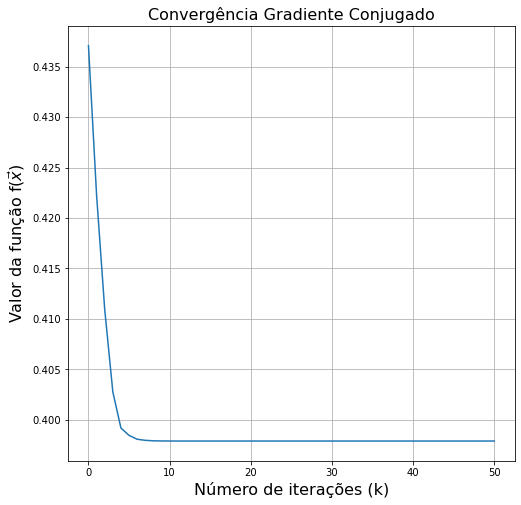

In [8]:
font = {
        'size': 16,
        }

plt.figure(figsize=(8,8))
plt.plot(np.arange(0,k+1),fHist)
plt.grid()
plt.title(f'Convergência {name}', fontdict=font)
plt.ylabel(r'Valor da função f($\vec{x}$)', fontdict=font)
plt.xlabel("Número de iterações (k)", fontdict=font)
plt.show()

In [9]:
print("Quantidade de chamadas da função obj = ", countFunc)
End = time.time()
print("Tempo de Execução =", End-Start, "s")	

Quantidade de chamadas da função obj =  256
Tempo de Execução = 23.918995141983032 s
